# Experimental Design Techniques

## Imports

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.formula.api import ols

In [2]:
marketing_data = pd.read_feather('marketing_data.feather')
marketing_data.sample(2)

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
177,Casual,Evening,0.467608,472
212,Casual,Evening,0.401607,43


In [9]:
productivity = pd.read_csv('productivity.csv')
productivity.sample(2)

,subject_id,productivity_score,block
21,22,5.0,1.0
534,535,23.3,3.0


In [18]:
exp_chick_data = pd.read_csv('exp_chick_data.csv')
exp_chick_data.sample(2)

,Chick,Diet,weight
97,9,1,59
165,14,1,259


In [19]:
cov_chick_data = pd.read_csv('cov_chick_data.csv')
cov_chick_data.sample(2)

,Chick,Time
114,10,14
228,21,16


## Factorial designs: principles and applications

### Understanding marketing campaign effectiveness

In [4]:
# Create a pivot table for marketing campaign data
marketing_pivot = marketing_data.pivot_table(
  values='Conversions', 
  index='Messaging_Style', 
  columns='Time_of_Day', 
  aggfunc='mean')

# View the pivoted results
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


### Heatmap of campaign interactions

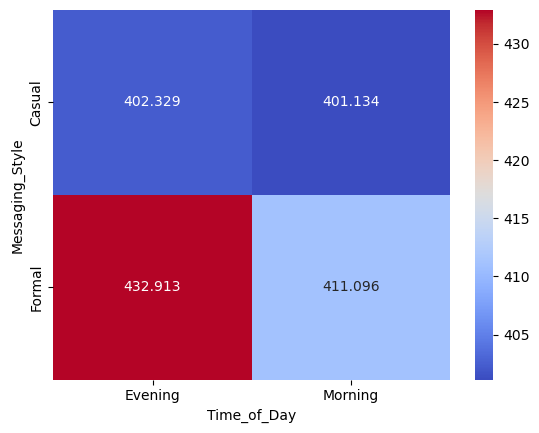

In [8]:
# Visualize interactions with a heatmap
sns.heatmap(marketing_pivot, 
         annot=True, 
         cmap='coolwarm',
         fmt='g')

plt.show()

## Randomized block design: controlling variance

### Implementing a randomized block design

In [13]:
# Randomly assign workers to blocks
prod_df = productivity.groupby('block').apply(
  lambda x: x.sample(frac=1)
)

# Reset the index
prod_df = prod_df.reset_index(drop=True)

# Assign treatment randomly
prod_df['Treatment'] = np.random.choice(
  ['Bonus', 'Profit Sharing', 'Work from Home'],
  size=len(prod_df)
)

/tmp/ipykernel_444534/4056560905.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prod_df = productivity.groupby('block').apply(


### Visualizing productivity within blocks by incentive

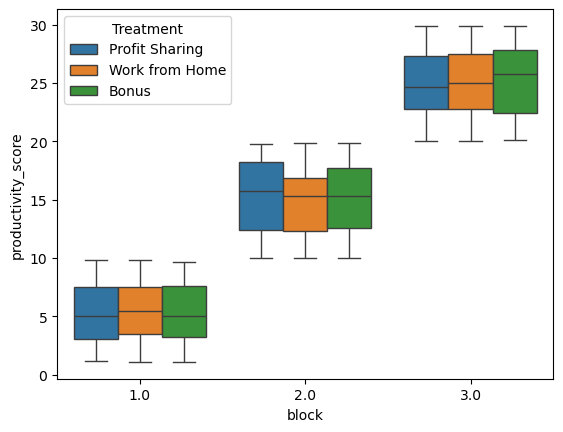

In [14]:
# Make a plot showing how positivity_score varies within blocks
sns.boxplot(x='block', 
            y='productivity_score', 
            hue='Treatment', 
            data=prod_df)

plt.show()

### ANOVA within blocks of employees

In [16]:
# Perform the within blocks ANOVA, first grouping by block
within_block_anova = prod_df.groupby('block').apply(
  # Set function
  lambda x: f_oneway(
    # Filter Treatment values based on outcome
    x[x['Treatment'] == 'Bonus']['productivity_score'], 
    x[x['Treatment'] == 'Profit Sharing']['productivity_score'],
    x[x['Treatment'] == 'Work from Home']['productivity_score'])
)
print(within_block_anova)

block
1.0    (0.48576336258089725, 0.6155784336682482)
2.0      (1.166039645555872, 0.3125660891348098)
3.0     (0.3973427435549923, 0.6723445450667649)
dtype: object


/tmp/ipykernel_444534/2885018250.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  within_block_anova = prod_df.groupby('block').apply(


## Covariate adjustment in experimental design

### Covariate adjustment with chick growth

In [20]:
# Join experimental and covariate data
merged_chick_data = pd.merge(exp_chick_data, 
                            cov_chick_data, on='Chick')

# Print the merged data
print(merged_chick_data)

      Chick  Diet  weight  Time
0         1     1      42     0
1         1     1      42     2
2         1     1      42     4
3         1     1      42     6
4         1     1      42     8
...     ...   ...     ...   ...
6813     50     4     264    14
6814     50     4     264    16
6815     50     4     264    18
6816     50     4     264    20
6817     50     4     264    21

[6818 rows x 4 columns]


In [21]:
# Join experimental and covariate data
merged_chick_data = pd.merge(exp_chick_data, 
                             cov_chick_data, on='Chick')

# Perform ANCOVA with Diet and Time as predictors
model = ols('weight ~ Diet + Time', data=merged_chick_data).fit()

# Print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     140.9
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.12e-60
Time:                        20:52:14   Log-Likelihood:                -38608.
No. Observations:                6818   AIC:                         7.722e+04
Df Residuals:                    6815   BIC:                         7.724e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0678      2.275     41.342      0.0

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     140.9
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.12e-60
Time:                        20:52:56   Log-Likelihood:                -38608.
No. Observations:                6818   AIC:                         7.722e+04
Df Residuals:                    6815   BIC:                         7.724e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0678      2.275     41.342      0.0

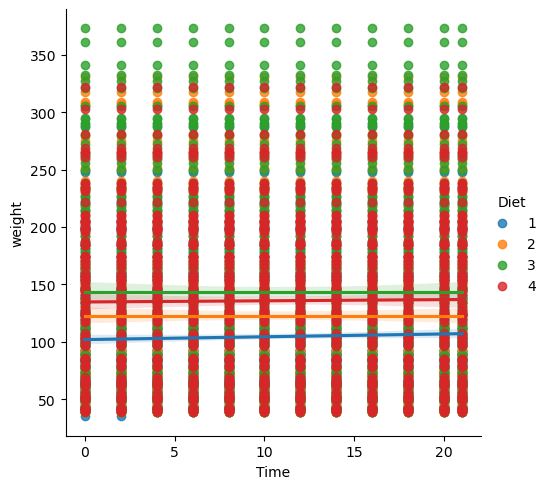

In [22]:
# Join experimental and covariate data
merged_chick_data = pd.merge(exp_chick_data, 
                             cov_chick_data, on='Chick')

# Perform ANCOVA with Diet and Time as predictors
model = ols('weight ~ Diet + Time', data=merged_chick_data).fit()

# Print a summary of the model
print(model.summary())

# Visualize Diet effects with Time adjustment
sns.lmplot(x='Time', y='weight', 
         hue='Diet', 
         data=merged_chick_data)
plt.show()